## Import all needed modules

In [1]:
from image import plotShapes, plotData
from CapSol import Laplace, Kelvin
import matplotlib.pyplot as plt
import numpy as np

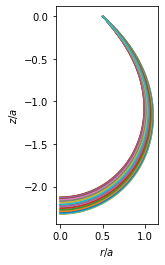

In [2]:
stressAmplitude, periods, count = 0.2, 1, 30
K, nu, eta, p_L, rho = 2.0, 0.5, 0.1, 2.0, 0.2

kelvin = Kelvin(stressAmplitude, periods, count, K, nu, eta, p_L, rho)
plotShapes(plt.gca(), kelvin.shapes)

### Fit shapes via numerical Kelvin shape fitting

In [3]:
# Here the reference image is specified and the image from which the
# fit will start, this is individual for every shape sequence and
# must be evaluated manually.
referenceShape = 0
periods = 1

laplaceFit = Laplace(kelvin.shapes[referenceShape])
kelvinFit = Kelvin(kelvin.shapes, laplaceFit.p_L, laplaceFit.rho, periods)

In [4]:
# Print the fit results
print(f"Input: K_2D = {kelvin.K}, eta = {kelvin.eta}")
print(f"Fit: K_2D = {kelvinFit.K}, eta = {kelvinFit.eta}")

Input: K_2D = 2.0, eta = 0.1
Fit: K_2D = 2.000000181496691, eta = 0.09999990102266282


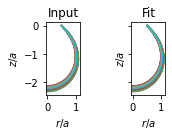

In [5]:
# Generating and plotting the fitted shapes from theory

fig, ax = plt.subplots(1,2,figsize=(3,2), sharey=True)
ax[0].set_title("Input")
ax[1].set_title("Fit")
plotShapes(ax[0], kelvin.shapes)
plotShapes(ax[1], kelvinFit.shapes)
plt.tight_layout()
plt.savefig("kelvin_ideal_fit.pdf")